# Transfer learning.
   
   
### - Contents : 
   - transfer learning basics
   
   - Loading Pre- trained models / Models for Transfer learning
     
   - Examples of Using Pretrained models

        - 
### - what is it?
    - In transfer learning, the knowledge of an already trained machine learning model is applied to a different but related problem. For example, if you trained a simple classifier to predict whether an image contains a backpack, you could use the knowledge that the model gained during its training to recognize other objects like sunglasses.

### - Why to use it ?
    - saves training time
    - better performance of neural networks(in most cases) 
    - not needing lot of data.
    
### - when to use ?
    - There isn't enough labeled training data to train your network from scratch.
    
    - There already exists a network that is pre-trained on a similar task, which is usually trained on massive amounts of data.
    - When task 1 and task 2 have the same input.
    
### - Approaches ? 
     - Training a model to reuse it. 
         - consider task A and B, where you dont hve enough data to solve task A, whereas B has the abundant data. Train the network on B and use that to solve A.
     - using pre - trained model
         - Keras provides nine pre-trained models that can be used for transfer learning, prediction, feature extraction and fine-tuning.
     - feature extraction
         - finds the most important features, also known as representation learning and can result in much better performance than can be obtained.
### - pattern ? 
- Classifier: 
        - The pre-trained model is used directly to classify new images.
- Standalone Feature Extractor: 
        - The pre-trained model, or some portion of the model, is used to pre-process images and extract relevant features.
- Integrated Feature Extractor:
        - The pre-trained model, or some portion of the model, is integrated into a new model, but layers of the pre-trained model are frozen during training.
- Weight Initialization: 
        - The pre-trained model, or some portion of the model, is integrated into a new model, and the layers of the pre-trained model are trained in concert with the new model.

In [7]:
#loding top 3 models 

#VGG16 
#load the VGG16 model pre trained model

from keras.applications.vgg16 import VGG16
#load model
model = VGG16()

#summarize the model 
model.summary()

553476096/553467096 [==============================] - 239s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [10]:
#inceptionV3
#load inceptionV3 pretrianed model

from keras.applications.inception_v3 import InceptionV3

#load the model
model = InceptionV3()

#model summary 
model.summary()

96124928/96112376 [==============================] - 36s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_____________________

Total params: 23,851,784
Trainable params: 23,817,352
Non-trainable params: 34,432
__________________________________________________________________________________________________


In [13]:
#ResNEt50

#load the resnet50 model

from keras.applications.resnet import ResNet50

#load the model
model = ResNet50()

#model summary

model.summary()

102981632/102967424 [==============================] - 19s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________

In [109]:
#example of using pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

import cv2
import matplotlib.pyplot as plt


#creating function to classify objects using VGG pretrained model

In [94]:
def model(img_path):
    #display image
    img_ = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    
    plt.figure(figsize = (10, 10))
    plt.imshow(img_)
    
    
    #LOAD AN IMAGE
    image = load_img(img_path, target_size = (224, 224))
    #convert image pixels into numpy array
    image = img_to_array(image)

    #reshape the data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    #prepare image for the vgg model
    image = preprocess_input(image)

    #laod the model
    model = ResNet50()

    #predict the probabilty across  all output classes
    prob = model.predict(image)

    #convert probabilites to class labels

    label = decode_predictions(prob)

    #retrieve the most likely result
    label = label[0][0]


    #print classification
    print('%s (%2f%%)' % (label[1], label[2]*100))


Pomeranian (74.823618%)


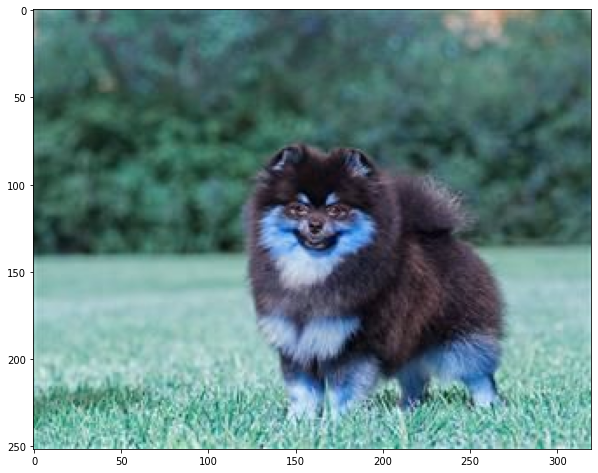

In [95]:
model('data/yeontan2.jpg')

banana (85.619557%)


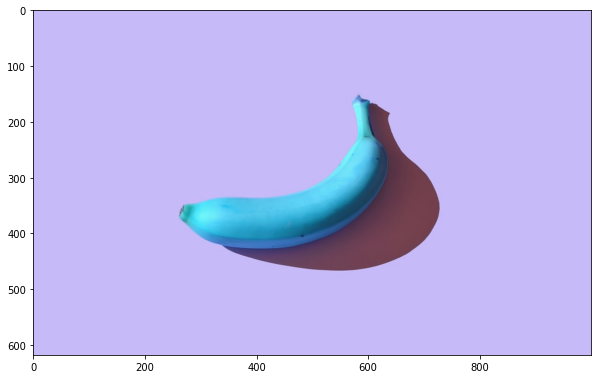

In [96]:
model('data/banana.jpg')

lion (99.910271%)


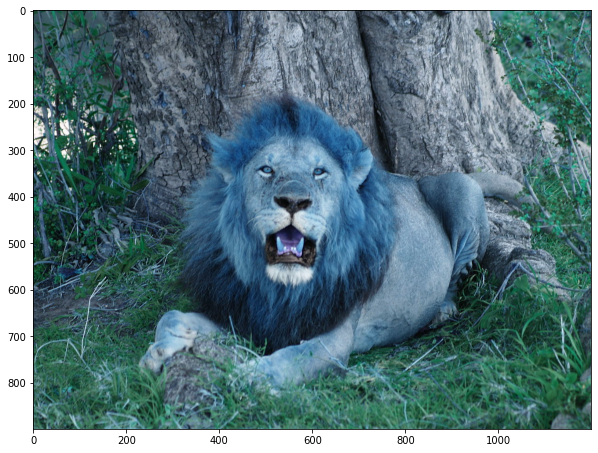

In [97]:
model('data/masai_lion.jpg')

### pre trained model as feature extractor preprocessor
- The pre-trained model can be used as a separate feature extraction program, in which case input can be pre-processed by the model or portion of the model to a given an output (e.g. vector of numbers) for each input image, that can then use as input when training a new model.

In [101]:
from keras.models import Model

image = load_img('data/yeontan2.jpg', target_size=(224, 224))

#convert images to numpy array
img = img_to_array(image)

#reshape
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

#preprare for the model
image = preprocess_input(img)

#load model
model = VGG16()

#remove output layer
model = Model(inputs = model.inputs, outputs=model.layers[-2].output)

#get extracted features
features = model.predict(image)

print(features.shape)

(1, 4096)


- The features are extracted from the loaded photo and the shape of the feature vector is printed, showing it has 4,096 numbers. 
- This process could be repeated for each photo in a new training dataset.



### pretrained model as  feature extractor in model

- We can use some or all of the layers in a pre-trained model as a feature extraction component of a new model directly.
- can be done by simply adding layers, which may involve adding new convolutional or pooling layers to expand feature extraction capabilities.

In [103]:
from keras.layers import Flatten, Dense
#load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3)) #include_top = FAlse helps to load model without classifier part.

#add new classifier layers
flat = Flatten()(model.layers[-1].output)
class_ = Dense(1024, activation='relu')(flat)
output = Dense(10, activation='softmax')(class_)
#define new model
model = Model(inputs=model.inputs, outputs = output)

#summarize 
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_57 (InputLayer)        [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0   

- We can see that we have flattened the output of the last pooling layer and added our new fully connected layers.

- This was the basic understanding of transfer learning using pre- trained model

- Thank you